### Zadanie 16 — (10p) 
Analiza głównych składowych dla metadanych muzycznych. Do tego zadania możesz wykorzystać własny zbiór danych (np. uzyskany ze Spotify) lub dowolny inny zbiór zawierający metadane utworów (np. ten). Metadane powinny zawierać informacje takie jak czy jest obecny wokal, taneczność, głośność, itp., usuń z nich informacje o gatunku.
- Wczytaj i zestandaryzuj dane. 
- Przeprowadź **PCA** redukując wymiar do 2 składowych głównych.
- Stwórz wykres przedstawiający utwory w przestrzeni dwóch głównych składowych. 
- Pokoloruj utwory według ich gatunków muzycznych.
- Oblicz proporcję wyjaśnionej wariancji dla każdej głównej składowej.

Postaraj się zinterpretować, co opisują dwie główne składowe. Które cechy mają na nie największy
wpływ?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [93]:
# Load the dataset
df = pd.read_csv('spotify_dataset.csv')
df = df.drop(columns=['Unnamed: 0'])
# Display the first few rows of the dataframe
print(df.head())

                 track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4   

In [94]:
print(df['track_genre'].value_counts())
print(df['track_genre'].unique())


track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Name: count, Length: 114, dtype: int64
['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'met

In [95]:
# Delete track_genre column
print(df.columns)
df_pca = df.drop(columns=['track_genre'])

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')


In [96]:
# Pytanie czy inne kategoryczne kolumny też usunąć?
df_pca = df_pca.drop(columns=["track_id", "artists", "album_name", "track_name"])
df_pca['explicit'] = df_pca['explicit'].astype(int)

# Standaryzacja danych
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)
df_scaled = pd.DataFrame(df_scaled, columns=df_pca.columns)

print(df_scaled.head())

   popularity  duration_ms  explicit  danceability    energy       key  \
0    1.782627     0.024575 -0.305767      0.629244 -0.717148 -1.210442   
1    0.975633    -0.730859 -0.305767     -0.845908 -1.889980 -1.210442   
2    1.065299    -0.160332 -0.305767     -0.742186 -1.122669 -1.491343   
3    1.692961    -0.243214 -0.305767     -1.733304 -2.312994 -1.491343   
4    2.186125    -0.271919 -0.305767      0.295030 -0.788711 -0.929541   

   loudness      mode  speechiness  acousticness  instrumentalness  liveness  \
0  0.300828 -1.326281     0.551848     -0.850202         -0.504109  0.758743   
1 -1.784744  0.753988    -0.078993      1.831732         -0.504094 -0.591211   
2 -0.293288  0.753988    -0.273826     -0.315499         -0.504112 -0.507167   
3 -2.039252  0.753988    -0.457309      1.774593         -0.503883 -0.428376   
4 -0.282750  0.753988    -0.303145      0.463399         -0.504112 -0.686285   

    valence     tempo  time_signature  
0  0.929306 -1.141863        0.221

In [97]:
# numeric_columns = df.select_dtypes(include=[np.number]).columns
# print(numeric_columns)
# categorical_columns = df.columns.difference(numeric_columns)
# print(categorical_columns)

# # Standardize the Data
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df[numeric_columns])
# df_scaled = pd.DataFrame(df_scaled, columns=numeric_columns)

# print(df_scaled.head())

In [98]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

Proporcja wyjaśnionej wariancji:
Składowa 1: 0.20
Składowa 2: 0.10


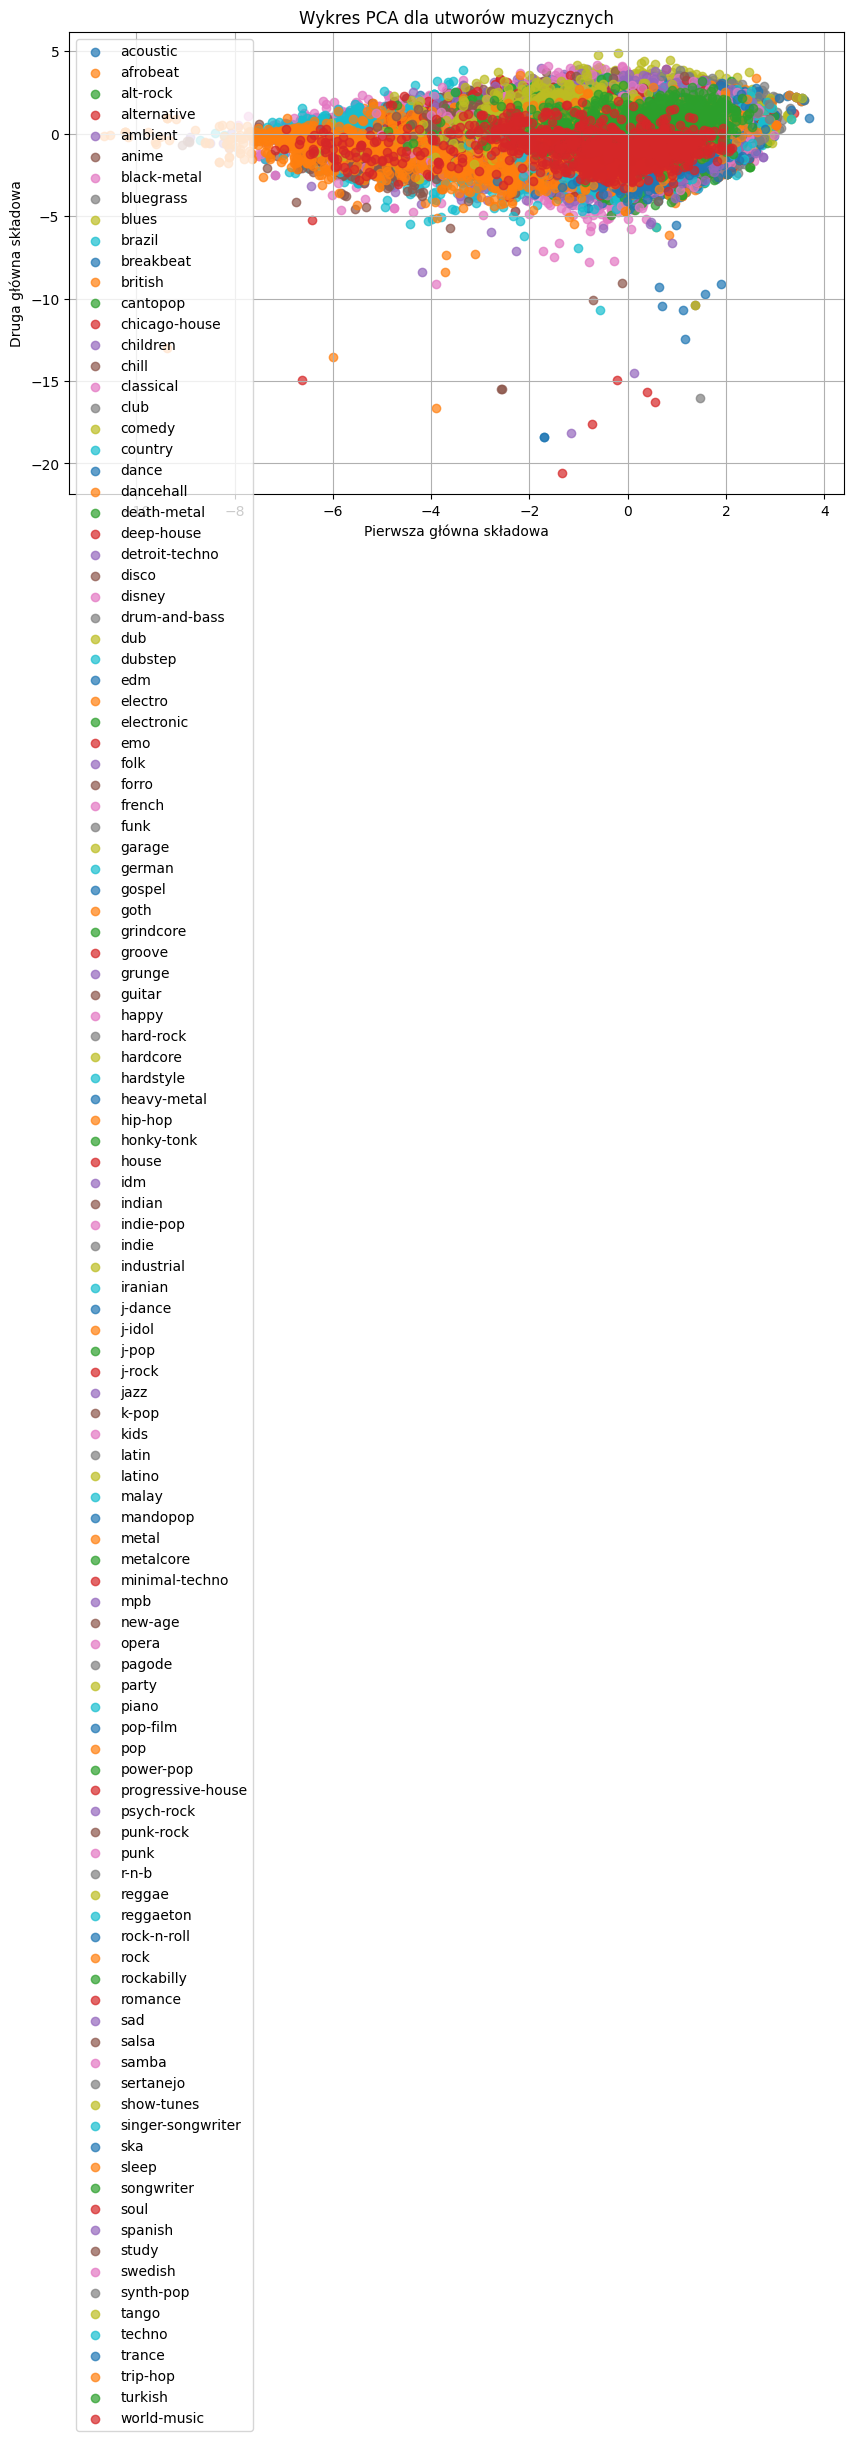

Wpływ cech na PCA:

Składowa 1:
popularity: 0.06
duration_ms: -0.03
explicit: 0.22
danceability: 0.44
energy: 0.85
key: 0.08
loudness: 0.86
mode: -0.10
speechiness: 0.19
acousticness: -0.73
instrumentalness: -0.47
liveness: 0.13
valence: 0.49
tempo: 0.31
time_signature: 0.34

Składowa 2:
popularity: 0.03
duration_ms: -0.50
explicit: 0.21
danceability: 0.56
energy: -0.34
key: -0.02
loudness: -0.12
mode: 0.12
speechiness: 0.22
acousticness: 0.42
instrumentalness: -0.39
liveness: -0.13
valence: 0.54
tempo: -0.31
time_signature: 0.07


In [99]:
# Obliczenie proporcji wyjaśnionej wariancji
explained_variance_ratio = pca.explained_variance_ratio_
print("Proporcja wyjaśnionej wariancji:")
print(f"Składowa 1: {explained_variance_ratio[0]:.2f}")
print(f"Składowa 2: {explained_variance_ratio[1]:.2f}")

# Dodanie wyników PCA do oryginalnych danych
df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

# Wykres PCA
plt.figure(figsize=(10, 6))
for genre in df["track_genre"].unique():
    subset = df[df["track_genre"] == genre]
    plt.scatter(subset["PCA1"], subset["PCA2"], label=genre, alpha=0.7)

plt.title("Wykres PCA dla utworów muzycznych")
plt.xlabel("Pierwsza główna składowa")
plt.ylabel("Druga główna składowa")
plt.legend()
plt.grid(True)
plt.show()

# Interpretacja cech wpływających na PCA
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
features = df_pca.columns

print("Wpływ cech na PCA:")
for i, component in enumerate(loadings.T):
    print(f"\nSkładowa {i + 1}:")
    for feature, loading in zip(features, component):
        print(f"{feature}: {loading:.2f}")

#### Ograniczenie się do mniejszej ilości gatunków

In [2]:
def map_genres_to_general(df, genre_column="track_genre"):
    """
    Maps specific music genres to general categories in a DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame containing a column with specific genres.
    genre_column (str): Name of the column with specific genres.

    Returns:
    pd.DataFrame: Updated DataFrame with an additional column 'general_genre'.
    """
    # Mapping of specific genres to general categories
    genre_mapping = {
        "Hip-Hop/Rap": ["hip-hop", "rap"],
        "Pop": ["pop", "indie-pop", "mandopop", "cantopop", "j-pop", "power-pop", "pop-film", "synth-pop"],
        "Rock Music": ["rock", "alt-rock", "alternative", "punk", "punk-rock", "psych-rock", "grunge", "emo", "hard-rock", "rock-n-roll", "metalcore", "indie", "british"],
        "Country": ["country", "honky-tonk", "bluegrass"],
        "Electronic Dance Music (EDM)": ["edm", "house", "deep-house", "techno", "trance", "minimal-techno", "progressive-house", "dubstep", "chicago-house", "detroit-techno", "disco", "club"],
        "Latin Music": ["latin", "latino", "samba", "salsa", "forro", "pagode", "mpb", "brazil"],
        "K-pop": ["k-pop"],
        "R&B/Soul": ["r-n-b", "soul", "funk", "groove"],
        "Jazz": ["jazz"],
        "Classical": ["classical", "opera", "piano", "new-age"],
        "Blues": ["blues"],
        "Metal": ["metal", "heavy-metal", "death-metal", "black-metal", "grindcore", "hardcore"],
        "Reggae/Dub": ["reggae", "dub", "dancehall"],
        "World Music": ["world-music", "iranian", "indian", "malay", "french", "spanish", "german", "turkish", "tango"],
        "Acoustic/Folk": ["acoustic", "folk", "singer-songwriter", "songwriter", "guitar"],
        "Chillout/Ambient": ["chill", "ambient", "trip-hop"],
        "Soundtracks": ["disney", "show-tunes", "party", "comedy", "romance", "happy", "kids", "study"],
        "Experimental/Industrial": ["idm", "industrial", "electronic", "electro"],
        "Ska/Reggaeton": ["ska", "reggaeton"],
        "Hardstyle/Hard Dance": ["hardstyle"],
        "Breakbeat/Drum and Bass": ["breakbeat", "drum-and-bass"]
    }

    num = 0
    all_genres = []
    for general, specifics in genre_mapping.items():
        num += len(specifics)
        all_genres.extend(specifics)
    print(num)

    df = df.copy()  # Ensure we're not modifying the original DataFrame

    # Filter out rows where track_genre is not in genre_mapping values
    valid_genres = [genre for sublist in genre_mapping.values() for genre in sublist]
    df = df[df[genre_column].isin(valid_genres)]

    # Reverse the mapping for easy lookup
    reverse_mapping = {specific: general for general, specifics in genre_mapping.items() for specific in specifics}

    # Map specific genres to general categories
    
    df.loc[:, "general_genre"] = df[genre_column].map(reverse_mapping).fillna("Other")  # Handle unmapped genres

    return df

In [5]:
# Load the dataset
df = pd.read_csv('spotify_dataset.csv')
df = df.drop(columns=['Unnamed: 0'])

df_general = map_genres_to_general(df, genre_column="track_genre")

print(df_general['general_genre'].value_counts())
print("Unique genres num: ", len(df_general['general_genre'].unique()))

100
general_genre
Rock Music                      13000
Electronic Dance Music (EDM)    12000
World Music                      9000
Latin Music                      8000
Soundtracks                      8000
Pop                              8000
Metal                            6000
Acoustic/Folk                    5000
Classical                        4000
Experimental/Industrial          4000
R&B/Soul                         4000
Country                          3000
Chillout/Ambient                 3000
Reggae/Dub                       3000
Breakbeat/Drum and Bass          2000
Ska/Reggaeton                    2000
Blues                            1000
Hardstyle/Hard Dance             1000
Hip-Hop/Rap                      1000
Jazz                             1000
K-pop                            1000
Name: count, dtype: int64
Unique genres num:  21


In [6]:
df_pca_general = df_general.drop(columns=['track_genre', 'general_genre'])

# Pytanie czy inne kategoryczne kolumny też usunąć?
df_pca_general = df_pca_general.drop(columns=["track_id", "artists", "album_name", "track_name"])
df_pca_general['explicit'] = df_pca_general['explicit'].astype(int)

# Standaryzacja danych
scaler = StandardScaler()
df_scaled_general = scaler.fit_transform(df_pca_general)
df_scaled_general = pd.DataFrame(df_scaled_general, columns=df_pca_general.columns)

In [7]:
print(df_scaled_general.head())

   popularity  duration_ms  explicit  danceability    energy       key  \
0    1.763892     0.001956 -0.303977      0.630440 -0.709692 -1.211257   
1    0.973378    -0.745490 -0.303977     -0.863016 -1.880190 -1.211257   
2    1.061213    -0.180996 -0.303977     -0.758007 -1.114407 -1.492073   
3    1.676057    -0.263001 -0.303977     -1.761423 -2.302362 -1.492073   
4    2.159149    -0.291403 -0.303977      0.292079 -0.781113 -0.930441   

   loudness      mode  speechiness  acousticness  instrumentalness  liveness  \
0  0.312844 -1.311005     0.540377     -0.842196         -0.514561  0.789364   
1 -1.841275  0.762773    -0.077825      1.818537         -0.514547 -0.583446   
2 -0.300800  0.762773    -0.268754     -0.311720         -0.514565 -0.497979   
3 -2.104148  0.762773    -0.448561      1.761850         -0.514338 -0.417854   
4 -0.289915  0.762773    -0.297486      0.461020         -0.514565 -0.680131   

    valence     tempo  time_signature  
0  0.957643 -1.161922        0.228

In [9]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled_general)

Proporcja wyjaśnionej wariancji:
Składowa 1: 0.20
Składowa 2: 0.10


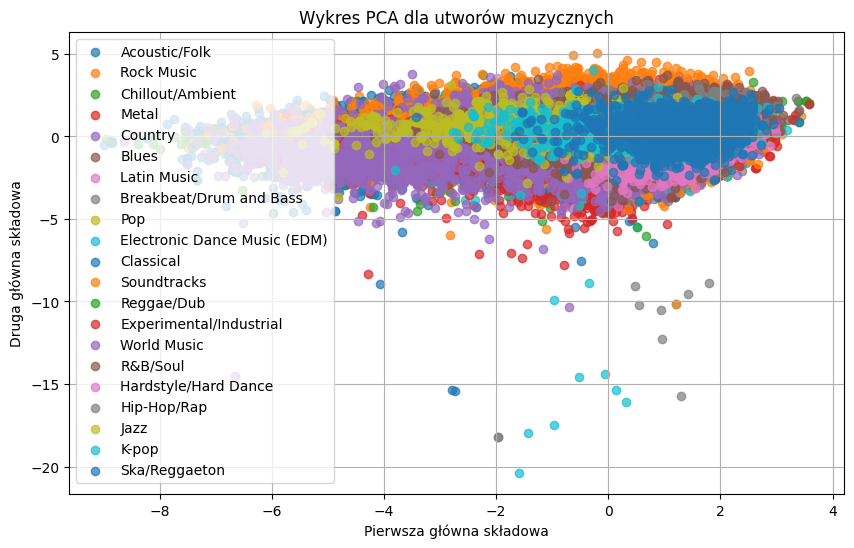

[2.96912966 1.54315566]
Wpływ cech na PCA:

Składowa 1:
popularity: 0.09
duration_ms: -0.04
explicit: 0.23
danceability: 0.42
energy: 0.86
key: 0.09
loudness: 0.86
mode: -0.11
speechiness: 0.19
acousticness: -0.75
instrumentalness: -0.45
liveness: 0.16
valence: 0.46
tempo: 0.28
time_signature: 0.31

Składowa 2:
popularity: 0.03
duration_ms: -0.50
explicit: 0.19
danceability: 0.53
energy: -0.32
key: -0.02
loudness: -0.12
mode: 0.13
speechiness: 0.22
acousticness: 0.41
instrumentalness: -0.44
liveness: -0.04
valence: 0.57
tempo: -0.33
time_signature: 0.04


In [19]:
# Obliczenie proporcji wyjaśnionej wariancji
explained_variance_ratio = pca.explained_variance_ratio_
print("Proporcja wyjaśnionej wariancji:")
print(f"Składowa 1: {explained_variance_ratio[0]:.2f}")
print(f"Składowa 2: {explained_variance_ratio[1]:.2f}")

# Dodanie wyników PCA do oryginalnych danych
df_general["PCA1"] = pca_result[:, 0]
df_general["PCA2"] = pca_result[:, 1]

# Wykres PCA
plt.figure(figsize=(10, 6))
for genre in df_general["general_genre"].unique():
    subset = df_general[df_general["general_genre"] == genre]
    plt.scatter(subset["PCA1"], subset["PCA2"], label=genre, alpha=0.7)

plt.title("Wykres PCA dla utworów muzycznych")
plt.xlabel("Pierwsza główna składowa")
plt.ylabel("Druga główna składowa")
plt.legend()
plt.grid(True)
plt.show()

print(pca.explained_variance_)
# Interpretacja cech wpływających na PCA
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
features = df_pca_general.columns

print("Wpływ cech na PCA:")
for i, component in enumerate(loadings.T):
    print(f"\nSkładowa {i + 1}:")
    for feature, loading in zip(features, component):
        print(f"{feature}: {loading:.2f}")

In [14]:
print(pca.components_)

[[ 0.0531158  -0.02209839  0.13191652  0.24350736  0.50094923  0.05195141
   0.5017547  -0.0626937   0.1126119  -0.43733544 -0.25900261  0.09508276
   0.26590892  0.16386649  0.18173779]
 [ 0.02398734 -0.40323766  0.15514846  0.42729919 -0.25567004 -0.01861
  -0.09474833  0.10205404  0.17943634  0.32768105 -0.35042045 -0.0315106
   0.45587129 -0.26941977  0.03601748]]


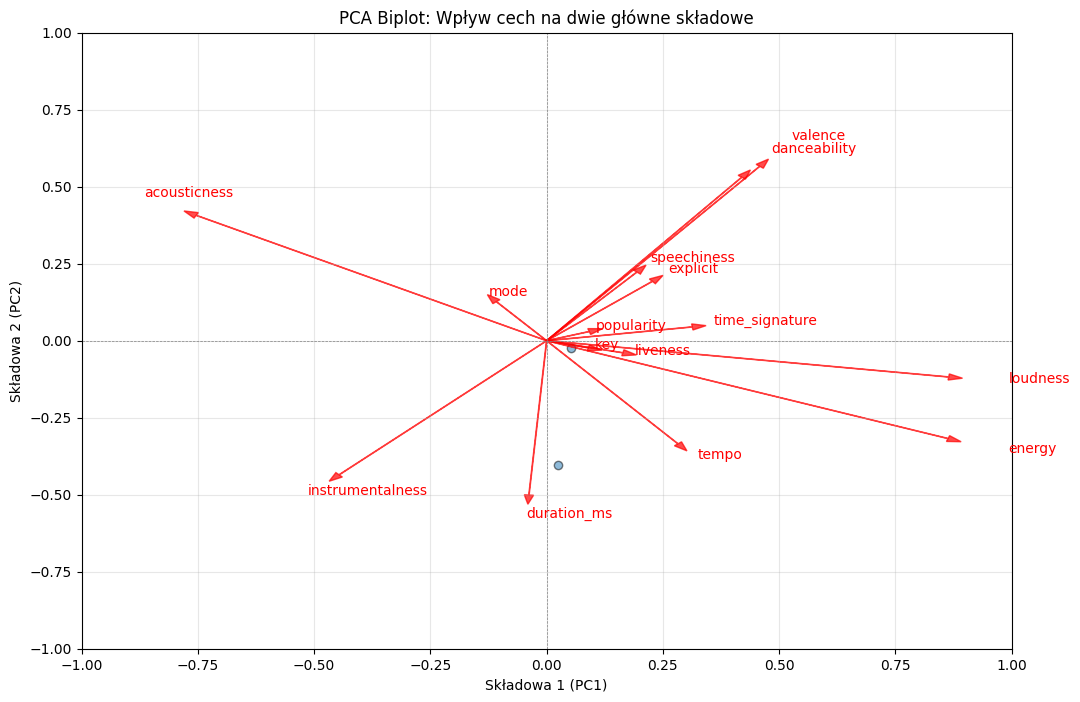

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pca_biplot(pca, components, feature_names, title="PCA Biplot"):
    """
    Tworzy biplot PCA pokazujący wpływ cech na główne składowe.

    Parameters:
    - pca: Dopasowany obiekt PCA z sklearn.
    - components: Zredukowane dane w przestrzeni PCA (np. X_pca).
    - feature_names: Lista nazw cech (np. kolumny z oryginalnego zbioru danych).
    - title: Tytuł wykresu.
    """
    plt.figure(figsize=(12, 8))

    # Scatter plot danych w przestrzeni PCA
    plt.scatter(components[:, 0], components[:, 1], alpha=0.5, edgecolor="k")

    # Strzałki dla cech
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    for i, (x, y) in enumerate(loadings[:, :2]):  # Tylko dla dwóch pierwszych składowych
        plt.arrow(0, 0, x, y, color='red', alpha=0.7, head_width=0.02, head_length=0.03)
        plt.text(x * 1.15, y * 1.15, feature_names[i], color='red', fontsize=10)

    # Oś OX i OY
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)

    plt.title(title)
    plt.xlabel("Składowa 1 (PC1)")
    plt.ylabel("Składowa 2 (PC2)")
    plt.xlim((-1.0, 1.0))
    plt.ylim((-1.0, 1.0))
    plt.grid(alpha=0.3)
    plt.show()

# Wykorzystanie funkcji
features = df_pca_general.columns  # Kolumny po standaryzacji
plot_pca_biplot(pca, pca.components_, features, title="PCA Biplot: Wpływ cech na dwie główne składowe")
